# Importacion de clase

In [1]:
from src.PipeLineEDACnn import ejecutar_eda_automatico


In [2]:
print("🚀 Ejecutando EDA automatizado (sin gráficos)...")
analizador, gen_train, gen_test, metadatos = ejecutar_eda_automatico()

print(f"\n✅ EDA completado. Datos listos para usar:")
print(f"  • Generador entrenamiento: {gen_train.samples} muestras")
print(f"  • Generador prueba: {gen_test.samples} muestras")
print(f"  • Número de clases: {metadatos['num_clases']}")
print(f"  • Forma de imagen: {metadatos['forma_imagen']}")

🚀 Ejecutando EDA automatizado (sin gráficos)...
🚀 Iniciando Pipeline EDA Automatizado
📦 Paso 1: Importaciones y configuración inicial
✅ Librerías importadas correctamente
🔧 Paso 2: Inicializar el analizador
✅ Analizador inicializado con directorio: C:\Users\pmari\OneDrive\Para Revisar\Documentos\GitKraken\AgroIAModulo1\Modulo1_AgroIA
📁 Paso 3: Configurar rutas y explorar estructura
📁 Contenido del directorio principal:
  - .git
  - .idea
  - .venv
  - api
  - api.log
  - app
  - app.log
  - data
  - main.py
  - notebooks
  - README.md
  - requirements.txt
  - src

🏷️ Clases disponibles en el dataset entrenamiento:
  1. Potato_Early_blight
  2. Potato_healthy
  3. Potato_Late_blight

🏷️ Clases disponibles en el dataset pruebas:
  1. Potato_Early_blight
  2. Potato_healthy
  3. Potato_Late_blight

📊 Paso 4: Análisis cuantitativo del dataset
📊 Distribución de imágenes entrenamiento por clase:
  Potato_Early_blight: 800 imágenes
  Potato_healthy: 100 imágenes
  Potato_Late_blight: 800 imág

# Creación del Modelo

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

model = Sequential()

# CAPA CONVOLUCIONAL
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=metadatos['forma_imagen'], activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CAPA CONVOLUCIONAL (más capas convolucionales conforme mayor complejidad del dataset de imágenes, aumentar progresivamente número de filtros en potencia de 2)
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=metadatos['forma_imagen'], activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CAPA CONVOLUCIONAL (más capas convolucionales conforme mayor complejidad del dataset de imágenes, aumentar progresivamente número de filtros en potencia de 2)
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=metadatos['forma_imagen'], activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CAPA FLATTEN: Convierte las imágenes de 250x335 en un array de 1 dimensión de 250x335 = 83750 valores antes de la capa final
model.add(Flatten())

# CAPA DENSE (Indicar neuronas potencia de 2, variable para optimizar modelo)
model.add(Dense(128))
model.add(Activation('relu'))

# CAPA DROPOUT (ayuda a reducir overfitting desactivando aleatoriamente neuronas durante el entrenamiento(epoc))
model.add(Dropout(0.5))

# CAPA FINAL DE CLASIFICACIÓN (3 posibles clases = 3 neuronas, si fuera problema binario utilizar 'sigmoid' y 1 neurona)
model.add(Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy', #binary_crossentropy si fuera binario
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,429,635 (28.34 MB)

 Trainable params: 7,429,635 (28.34 MB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento del modelo

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
results = model.fit(gen_train,
                              epochs=10,
                              validation_data=gen_test,
                              callbacks=[early_stop])

Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 74s 671ms/step - accuracy: 0.4975 - loss: 1.1993 - val_accuracy: 0.7965 - val_loss: 0.6357
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 65s 607ms/step - accuracy: 0.7695 - loss: 0.5863 - val_accuracy: 0.8142 - val_loss: 0.4437
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 65s 606ms/step - accuracy: 0.8323 - loss: 0.4328 - val_accuracy: 0.9027 - val_loss: 0.2559
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 67s 621ms/step - accuracy: 0.8797 - loss: 0.2988 - val_accuracy: 0.9314 - val_loss: 0.1848
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 69s 646ms/step - accuracy: 0.8963 - loss: 0.2574 - val_accuracy: 0.9181 - val_loss: 0.2290
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 71s 666ms/step - accuracy: 0.9277 - loss: 0.2216 - val_accuracy: 0.9292 - val_loss: 0.1769
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 70s 654ms/step - accuracy: 0.9294 - loss: 0.2023 - val_accuracy: 0.9381 - val_loss: 0.1674
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 74s 693ms/step - accuracy: 0.9298 - loss: 0

<Axes: >

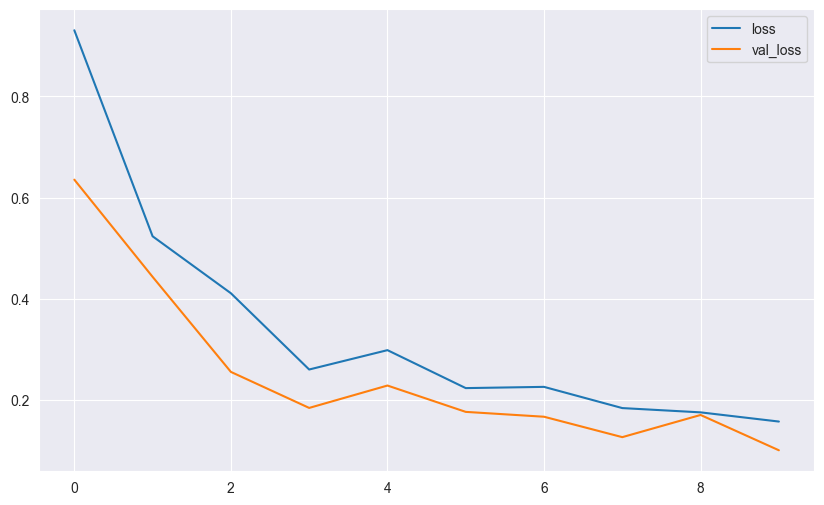

In [34]:
import pandas as pd
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

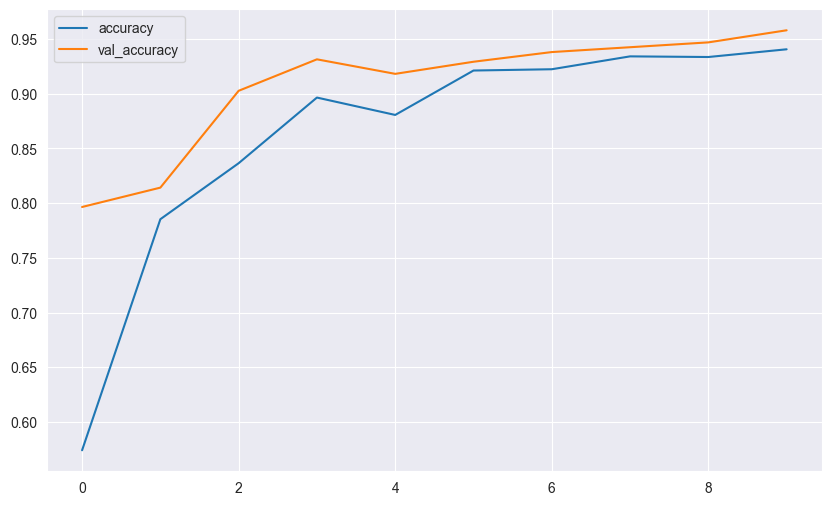

In [35]:
losses[['accuracy','val_accuracy']].plot()

# Evaluación del modelo

## Predicción sobre el conjunto de Test


In [36]:
model.metrics_names

['loss', 'compile_metrics']

In [37]:
model.evaluate(gen_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9751 - loss: 0.0569


[0.10108809173107147, 0.9579645991325378]

In [38]:
pred_probabilities = model.predict(gen_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step


In [39]:
pred_probabilities

array([[9.9999976e-01, 2.3241853e-07, 1.1445134e-14],
       [9.9981123e-01, 1.8875804e-04, 5.2951060e-10],
       [9.9776411e-01, 2.2358350e-03, 1.4089204e-08],
       ...,
       [1.3879554e-09, 4.3040896e-03, 9.9569595e-01],
       [1.7592610e-06, 3.3894122e-02, 9.6610415e-01],
       [2.4089988e-07, 2.2393594e-02, 9.7760618e-01]], dtype=float32)

In [40]:
import numpy as np
# predictions = model.predict_classes(test_image_gen)
#Usar si la sale predict_classes como deprecated:
predictions = np.argmax(model.predict(gen_test), axis=-1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step


In [41]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(gen_test.classes,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       200
           1       0.97      0.93      0.95       200
           2       0.83      0.94      0.88        52

    accuracy                           0.96       452
   macro avg       0.93      0.95      0.94       452
weighted avg       0.96      0.96      0.96       452



In [45]:
confusion_matrix(gen_test.classes,predictions)

array([[198,   2,   0],
       [  4, 186,  10],
       [  0,   3,  49]])

<Axes: >

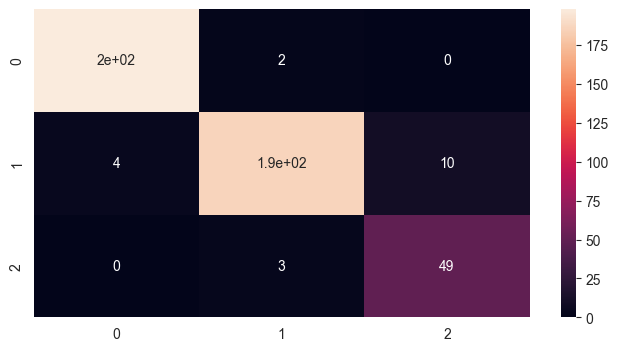

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(gen_test.classes,predictions),annot=True)

## Predicción para una nueva imagen

In [118]:
ruta_nueva_imagen =r"C:\Users\pmari\OneDrive\Para Revisar\Documentos\GitKraken\AgroIAModulo1\Modulo1_AgroIA\data\raw\Prueba\Tarde.jpg"

In [119]:
from tensorflow.keras.preprocessing import image

In [120]:
nueva_imagen = image.load_img(ruta_nueva_imagen,target_size=metadatos['forma_imagen'])

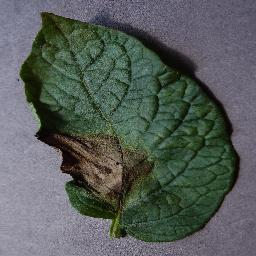

In [121]:
nueva_imagen

In [122]:
type(nueva_imagen)

PIL.JpegImagePlugin.JpegImageFile

In [123]:
nueva_imagen = image.img_to_array(nueva_imagen)

In [124]:
type(nueva_imagen)

numpy.ndarray

In [125]:
nueva_imagen.shape

(256, 256, 3)

In [126]:
nueva_imagen = np.expand_dims(nueva_imagen, axis=0)

In [127]:
nueva_imagen.shape

(1, 256, 256, 3)

In [128]:
model.predict(nueva_imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[1.1303176e-28, 0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [117]:
gen_test.class_indices

{'Potato_Early_blight': 0, 'Potato_Late_blight': 1, 'Potato_healthy': 2}

# Guardar Modelo

In [33]:
#model.save('modelo_CNN_Papas.h5')